In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 1.5 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.7 MB 1.5 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/8.7 MB 1.3 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.7 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.7 MB 1.3 MB/s eta 0:00:06
   -------- ------------------------------- 1.8/8.7 MB 1.2 MB/s eta 0:00:06
   --------- ------------------------------ 2.1/8.7 MB 1.2 MB/s eta 0:00:06
   ------------ --------------------------- 2.6/8.7 MB 1.3 MB/s eta 0:00:05
   ------------- -------------------------- 2.9/8.7 MB 1.3 MB/s eta 0:00:05
   -------------- ------------------------- 3.1/8.7 MB 1.3 MB/s eta 0:00:05
   --------------- --------------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [3]:
pip install kaggle


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------------------------- ------------- 0.8/1.2 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_csv("StudentsPerformance.csv")
print(df.head())

   gender race/ethnicity  ... reading score writing score
0  female        group B  ...            72            74
1  female        group C  ...            90            88
2  female        group B  ...            95            93
3    male        group A  ...            57            44
4    male        group C  ...            78            75

[5 rows x 8 columns]


In [5]:
#Step3:Inspect the dataset
print("\n---Basic Info---")
print(df.info())
print("\n---Summary---")
print(df.describe())


---Basic Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

---Summary---
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000

In [6]:
#Step4:Clean & Preprocess
df.columns = df.columns.str.replace(' ','_') # Replace spaces with underscores
df = df.dropna() # Remove missing rows if any
print("\n Data cleaned successfully!")


 Data cleaned successfully!


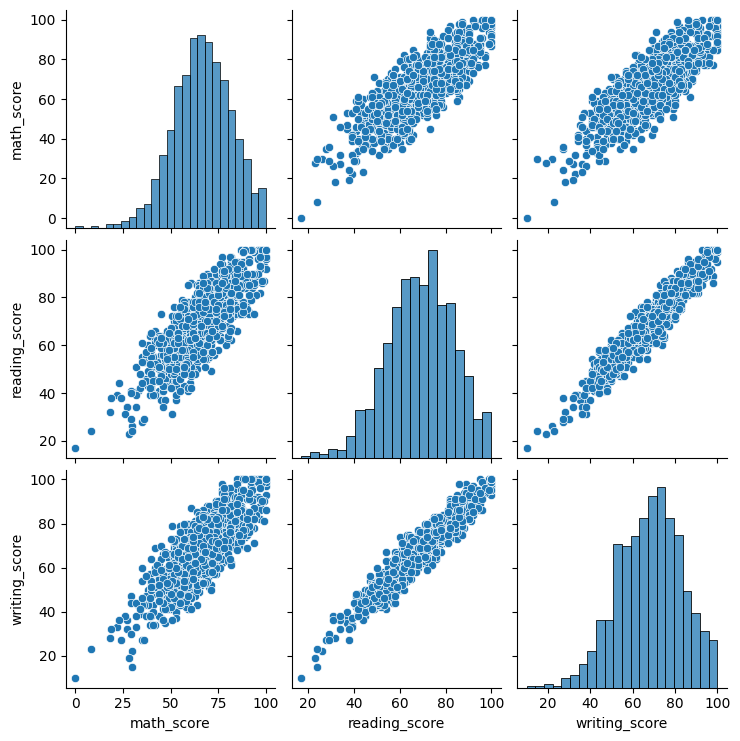

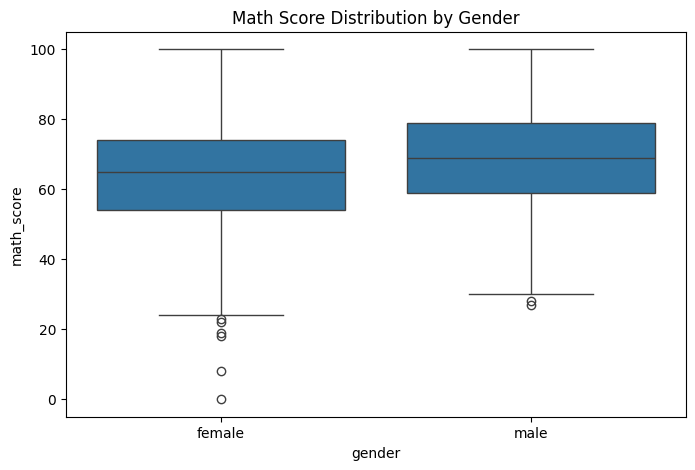

In [7]:
#Step5:Exploratory Data Analysis (EDA)
sns.pairplot(df)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='gender',y='math_score',data=df)
plt.title("Math Score Distribution by Gender")
plt.show()

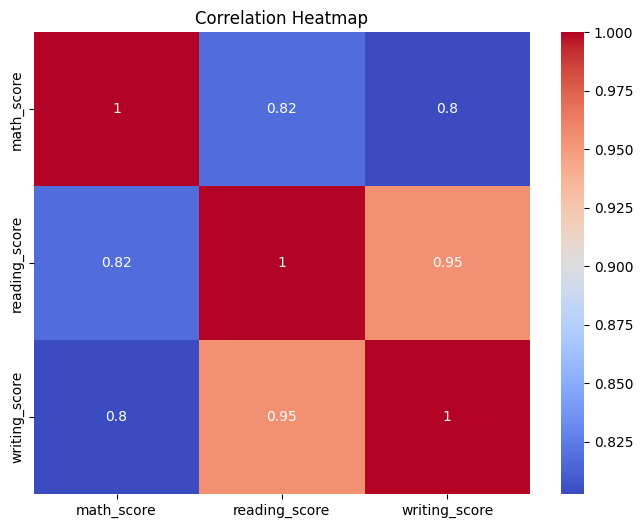

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Step 6: Feature Selection 
#Predicting math score using reading score & writing score
x = df[['reading_score','writing_score']]
y = df['math_score']

In [10]:
#Step 7:Train-test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("\n Data split complete!") 


 Data split complete!


In [14]:
#train model
model = LinearRegression()
model.fit(x_train,y_train)

print("\n--- Model Parameters ---")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


--- Model Parameters ---
Intercept: 7.85940588782988
Coefficients: [0.57555997 0.27176146]


In [12]:
#make prediction
y_pred = model.predict(x_test)

In [13]:
#Evaluate model
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error: ", round(mae, 2))
print("R-squared: ", round(r2, 2))

Mean Absolute Error:  7.35
R-squared:  0.68


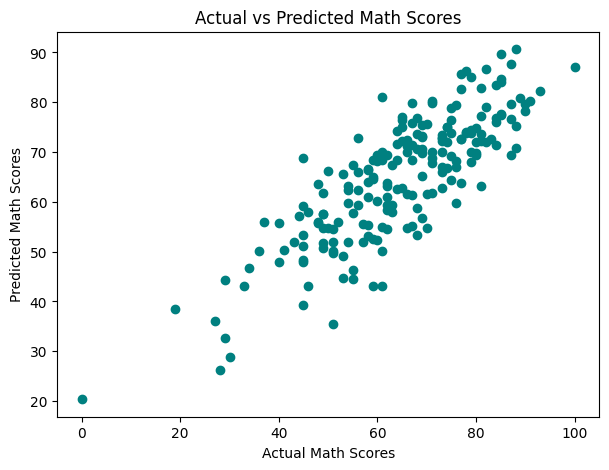

In [15]:
#Visualize predictions
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='teal')
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.show()

In [18]:
# Predict math score for a new student
new_data = pd.DataFrame({
    'reading_score':[72],
    'writing_score':[78]
})
predicted_score = model.predict(new_data)
print(f"\n Predicted Math Score for reading=72 & Writing=78 : {predicted_score[0]:2f}")


 Predicted Math Score for reading=72 & Writing=78 : 70.497118
